In [201]:
# Basic usage
import os,sys
from datetime import datetime, timedelta
from dotenv import load_dotenv

# Data processing
import pandas as pd
from pandas import to_datetime
import numpy as np
import csv

print (sys.path)
#vscode usage
sys.path.append(os.path.abspath(os.curdir))

# Customized usage
from dao.BikeStationsDao import BikeStation_api
from dao.CurrentWeatherDao import weather_api
from models.BikeStations import Stations

# Web development
from flask_fontawesome import FontAwesome
from flask import Flask, render_template, request, jsonify
from sqlalchemy import create_engine

# Library Imports.
import matplotlib.pyplot as plt

# Allows plots to appear directly in the notebook.
%matplotlib inline

# training model 
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 
import pickle

#Pycharm usage 
#local_path = os.path.abspath(os.curdir)+"/.."
#vs code usage 
local_path = os.path.abspath(os.curdir)

print(local_path)
config_path = local_path+"/.env"
print(config_path)
load_dotenv(config_path)
URI = os.getenv("URI")
PORT = "3306"
PASSWORD = os.getenv("PASSWORD")
DB = os.getenv("DB")
USER = os.getenv("User") # note: USER will get user name of this computer.
mysql_url = "mysql+pymysql://{}:{}@{}:{}/{}".format(USER, PASSWORD, URI, PORT, DB)

['/Users/Hank.Da/Documents/UCD/Semester2/COMP30830-Software Engineering/bike_project/COMP30830_DublinBike', '/Users/Hank.Da/anaconda3/envs/comp30830/lib/python39.zip', '/Users/Hank.Da/anaconda3/envs/comp30830/lib/python3.9', '/Users/Hank.Da/anaconda3/envs/comp30830/lib/python3.9/lib-dynload', '', '/Users/Hank.Da/anaconda3/envs/comp30830/lib/python3.9/site-packages', '/Users/Hank.Da/anaconda3/envs/comp30830/lib/python3.9/site-packages/IPython/extensions', '/Users/Hank.Da/.ipython', '/Users/Hank.Da/Documents/UCD/Semester2/COMP30830-Software Engineering/bike_project/COMP30830_DublinBike', '/Users/Hank.Da/Documents/UCD/Semester2/COMP30830-Software Engineering/bike_project/COMP30830_DublinBike', '/Users/Hank.Da/Documents/UCD/Semester2/COMP30830-Software Engineering/bike_project/COMP30830_DublinBike', '/Users/Hank.Da/Documents/UCD/Semester2/COMP30830-Software Engineering/bike_project/COMP30830_DublinBike', '/Users/Hank.Da/Documents/UCD/Semester2/COMP30830-Software Engineering/bike_project/CO

In [2]:
engine = create_engine(mysql_url, echo=True)
dao_bike = BikeStation_api(engine)

### 1. Read table from RDS and store it to csv file.

In [112]:
def get_station():
    file_name = "stations.csv"
    df = pd.read_sql_query("select * from dbike.stations order by last_update desc",engine)
    df.to_csv(file_name)
get_station()

NameError: name 'engine' is not defined

In [113]:
def get_weather():
    file_name = "weather.csv"
    df = pd.read_sql_query("select * from dbike.weather order by current desc",engine)
    df.to_csv(file_name)
get_weather()

NameError: name 'engine' is not defined

### 1. Read csv file as dataframe

* df_weather for weather table

* dict_stations for stations table, dict_stations['station_id'] is a dataframe for specific station id

In [114]:
df = pd.read_csv('weather.csv')
del df["Unnamed: 0"]
df.head(10)

,lat,lon,timezone,current,wether_id,weather_icon,visibility,wind_speed,wind_deg,wind_gust,...,feels_like,temp_min,temp_max,pressure,humidity,rain_1h,snow_1h,sunrise,sunset,description
0,53.344,-6.2672,3600,2021-03-31 18:58:10,803,NaN,NaN,3.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clouds
1,53.344,-6.2672,3600,2021-03-31 18:52:22,803,04d,10000.0,3.09,90.0,0.0,...,283.38,282.59,285.15,1019.0,93.0,0.0,0.0,2021-03-31 06:00:33,2021-03-31 18:57:32,Clouds
2,53.344,-6.2672,3600,2021-03-31 18:50:29,803,04d,10000.0,3.09,90.0,0.0,...,283.47,282.59,285.15,1019.0,93.0,0.0,0.0,2021-03-31 06:00:33,2021-03-31 18:57:32,Clouds
3,53.344,-6.2672,3600,2021-03-31 18:46:53,803,NaN,NaN,3.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clouds
4,53.344,-6.2672,3600,2021-03-31 18:41:52,803,04d,10000.0,3.60,90.0,0.0,...,284.06,284.26,285.15,1019.0,82.0,0.0,0.0,2021-03-31 06:00:33,2021-03-31 18:57:32,Clouds
5,53.344,-6.2672,3600,2021-03-31 18:35:03,803,NaN,NaN,3.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clouds
6,53.344,-6.2672,3600,2021-03-31 18:29:52,803,04d,10000.0,3.60,90.0,0.0,...,284.16,284.26,285.15,1019.0,82.0,0.0,0.0,2021-03-31 06:00:33,2021-03-31 18:57:32,Clouds
7,53.344,-6.2672,3600,2021-03-31 18:29:44,803,NaN,NaN,3.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clouds
8,53.344,-6.2672,3600,2021-03-31 18:15:54,803,NaN,NaN,3.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clouds
9,53.344,-6.2672,3600,2021-03-31 18:15:39,803,04d,10000.0,3.60,90.0,0.0,...,284.28,284.82,285.15,1019.0,82.0,0.0,0.0,2021-03-31 06:00:33,2021-03-31 18:57:32,Clouds


In [115]:
df_stations = pd.read_csv('stations.csv')
del df_stations["Unnamed: 0"]
df_stations.head(10)

,number,name,address,pos_lat,pos_lng,bike_stands,available_bike_stands,available_bikes,last_update
0,76,MARKET STREET SOUTH,Market Street South,53.3423,-6.28766,38,35,3,2021-03-31 19:13:37
1,36,ST. STEPHEN'S GREEN EAST,St. Stephen's Green East,53.3378,-6.25603,40,26,14,2021-03-31 19:13:25
2,33,PRINCES STREET / O'CONNELL STREET,Princes Street / O'Connell Street,53.3490,-6.26031,23,2,21,2021-03-31 19:13:20
3,72,JOHN STREET WEST,John Street West,53.3431,-6.27717,31,26,5,2021-03-31 19:13:09
4,104,GRANGEGORMAN LOWER (CENTRAL),Grangegorman Lower (Central),53.3552,-6.27842,40,35,5,2021-03-31 19:13:09
5,63,FENIAN STREET,Fenian Street,53.3414,-6.24672,35,26,9,2021-03-31 19:13:01
6,65,CONVENTION CENTRE,Convention Centre,53.3474,-6.23852,40,32,8,2021-03-31 19:13:00
7,77,WOLFE TONE STREET,Wolfe Tone Street,53.3489,-6.26746,29,25,4,2021-03-31 19:13:00
8,2,BLESSINGTON STREET,Blessington Street,53.3568,-6.26814,20,9,11,2021-03-31 19:13:00
9,85,ROTHE ABBEY,Rothe Abbey,53.3388,-6.30395,35,26,9,2021-03-31 19:12:56


* Seperate stations dataframe to specific station table, and filter interested columns. 
* Set last_update as index.

In [116]:
stations_id = df_stations["number"].unique()
# print("stations id", stations_id)

stations_feature_column = ["last_update","number","bike_stands","available_bikes"]

dict_stations = {}

for id in stations_id:
    dict_stations[id] = df_stations.loc[df_stations['number'] == id][stations_feature_column].sort_values('last_update')
    

df_station36 = dict_stations[36]
df_station36['last_update'] = pd.to_datetime(df_station36['last_update'])
# converting this to the index so we can preserve the date_start_time columns so you can validate the merging logic
df_station36= df_station36.set_index('last_update')

print("shape of station36: ", df_station36.shape)
df_station36.head()

shape of station36:  (3960, 3)


,number,bike_stands,available_bikes
last_update,,,
2021-03-05 13:46:42,36,40,6
2021-03-05 13:56:48,36,40,6
2021-03-05 14:08:54,36,40,5
2021-03-05 14:18:49,36,40,6
2021-03-05 14:28:55,36,40,6


* Seperate stations dataframe to specific station table, and filter out not interested columns. 

In [117]:
feature_column = ["current","feels_like","humidity","wind_speed","wether_id"]
df_weather = df[feature_column]
df_weather = df_weather.rename(columns={'current': 'last_update'})
df_weather = df_weather.sort_values('last_update')
df_weather['last_update'] = pd.to_datetime(df_weather['last_update'])
df_weather = df_weather.set_index('last_update')

print("shape of df_weather: ", df_weather.shape)
df_weather.head()

shape of df_weather:  (5703, 4)


,feels_like,humidity,wind_speed,wether_id
last_update,,,,
2021-03-05 13:41:13,273.62,65.0,3.60,803
2021-03-05 13:51:08,NaN,NaN,3.09,803
2021-03-05 13:52:22,273.94,60.0,3.09,803
2021-03-05 14:04:48,273.84,60.0,3.09,803
2021-03-05 14:05:10,NaN,NaN,3.09,803


### 2. Drop columns with nan value

In [118]:
df_weather = df_weather.dropna()
df_station36 = df_station36.dropna()

print("shape of df_weather: ", df_weather.shape)
print("shape of station36: ", df_station36.shape)


shape of df_weather:  (2860, 4)
shape of station36:  (3960, 3)


### 3. Merge weather and stations dataframe by index (last_update).

In [119]:
# the magic happens below, check the direction and tolerance arguments
tol = pd.Timedelta('5 minute')
df_station36_features = pd.merge_asof(left=df_weather,right=df_station36,right_index=True,left_index=True,direction='nearest',tolerance=tol)

df_station36_features = df_station36_features.dropna()
df_station36_features.head()

,feels_like,humidity,wind_speed,wether_id,number,bike_stands,available_bikes
last_update,,,,,,,
2021-03-05 13:52:22,273.94,60.0,3.09,803,36.0,40.0,6.0
2021-03-05 14:04:48,273.84,60.0,3.09,803,36.0,40.0,5.0
2021-03-05 14:14:48,273.84,60.0,3.09,803,36.0,40.0,6.0
2021-03-05 14:29:08,272.64,56.0,4.63,803,36.0,40.0,6.0
2021-03-05 14:44:49,273.46,56.0,3.60,803,36.0,40.0,5.0


### 4. Separate df_station36_features by weekday and weekend, so each station will has two models.

In [186]:
df_station36_features['date'] = pd.to_datetime(df_station36_features.index, format='%Y-%m-%d', errors='ignore')

# day_of_week, 0 stands for Mon, 6 stands for Sat
df_station36_features['day_of_week'] = df_station36_features['date'].dt.dayofweek
# period = hour*6 + round(min/10)
df_station36_features['time'] = [d.time() for d in df_station36_features.index]
df_station36_features['period'] = df_station36_features.apply(lambda x: (int(round(x["time"].minute/10)) + x["time"].hour*6), axis=1)

df_station36_features.describe()

df_station36_features.to_csv("station36.csv")

In [137]:
del df_station36_features['date']

df_station36_features.head()

,feels_like,humidity,wind_speed,wether_id,number,bike_stands,available_bikes,day_of_week,time,period
last_update,,,,,,,,,,
2021-03-05 13:52:22,273.94,60.0,3.09,803,36.0,40.0,6.0,4,13:52:22,83
2021-03-05 14:04:48,273.84,60.0,3.09,803,36.0,40.0,5.0,4,14:04:48,84
2021-03-05 14:14:48,273.84,60.0,3.09,803,36.0,40.0,6.0,4,14:14:48,85
2021-03-05 14:29:08,272.64,56.0,4.63,803,36.0,40.0,6.0,4,14:29:08,87
2021-03-05 14:44:49,273.46,56.0,3.60,803,36.0,40.0,5.0,4,14:44:49,88


In [135]:
# Look at correlations for all the continuous features.
df_station36_features[['feels_like', 'humidity', 'wind_speed', 'available_bikes',"day_of_week","period"]].corr()

,feels_like,humidity,wind_speed,available_bikes,day_of_week,period
feels_like,1.000000,-0.067977,-0.200281,0.037583,-0.410058,0.152276
humidity,-0.067977,1.000000,-0.058267,-0.034561,-0.033779,-0.287723
wind_speed,-0.200281,-0.058267,1.000000,0.161314,0.060074,0.047743
available_bikes,0.037583,-0.034561,0.161314,1.000000,-0.177639,0.043794
day_of_week,-0.410058,-0.033779,0.060074,-0.177639,1.000000,0.007018
period,0.152276,-0.287723,0.047743,0.043794,0.007018,1.000000


In [176]:
df_weekDay = df_station36_features[df_station36_features['day_of_week'] <= 3]
df_weekEnd = df_station36_features[df_station36_features['day_of_week'] >3]

print(df_weekDay.corr())
print(df_weekEnd.corr())

                 feels_like  humidity  wind_speed  wether_id  number  \
feels_like         1.000000 -0.190851   -0.302401   0.006235     NaN   
humidity          -0.190851  1.000000   -0.125993  -0.155715     NaN   
wind_speed        -0.302401 -0.125993    1.000000  -0.059098     NaN   
wether_id          0.006235 -0.155715   -0.059098   1.000000     NaN   
number                  NaN       NaN         NaN        NaN     NaN   
bike_stands             NaN       NaN         NaN        NaN     NaN   
available_bikes   -0.039364 -0.094607   -0.112065  -0.061985     NaN   
day_of_week       -0.280440  0.106468    0.201277   0.025079     NaN   
period             0.211119 -0.284929    0.058521   0.076308     NaN   

                 bike_stands  available_bikes  day_of_week    period  
feels_like               NaN        -0.039364    -0.280440  0.211119  
humidity                 NaN        -0.094607     0.106468 -0.284929  
wind_speed               NaN        -0.112065     0.201277  0.0585

### 5. Generate test and training set to evaluate and train model

In [213]:
# Prepare the descriptive features
#print(df.head(10))
features_weekDay = ['feels_like', 'humidity', 'wind_speed',"day_of_week","period"]
features_weekEnd = ['feels_like', 'humidity', 'wind_speed',"day_of_week","period"]
X_1 = df_weekDay[features_weekDay]
Y_1 = df_weekDay.available_bikes

X_2 = df_weekDay[features_weekEnd]
Y_2 = df_weekDay.available_bikes

test_size = 0.33
seed = 7

X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1, Y_1, test_size=test_size, random_state=seed)
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, test_size=test_size, random_state=seed)

In [214]:
# Train a model using linear regression from scikit-learn.
# By default sklearn fits an intercept.
# Use only the descriptive feature Size.
linreg1 = LinearRegression().fit(X_1[features_weekDay], Y_1)
linreg2 = LinearRegression().fit(X_2[features_weekEnd], Y_2)

# save the model to disk
filename_1 = 'station_36_weekDay_'+datetime.today().strftime('%Y-%m-%d')+'.sav'
filename_2 = 'station_36_weekEnd_'+datetime.today().strftime('%Y-%m-%d')+'.sav'

pickle.dump(linreg1, open(filename_1, 'wb'))
pickle.dump(linreg2, open(filename_2, 'wb'))

In [215]:
# Print the estimated linear regression coefficients.
print("Features: \n", features_weekDay)
print("Coeficients: \n", linreg1.coef_)
print("\nIntercept: \n", linreg1.intercept_)

# Print the estimated linear regression coefficients.
print("Features: \n", features_weekEnd)
print("Coeficients: \n", linreg2.coef_)
print("\nIntercept: \n", linreg2.intercept_)

Features: 
 ['feels_like', 'humidity', 'wind_speed', 'day_of_week', 'period']
Coeficients: 
 [-0.12251848 -0.07377377 -0.45643202  1.12210895  0.00774047]

Intercept: 
 50.96918417565403
Features: 
 ['feels_like', 'humidity', 'wind_speed', 'day_of_week', 'period']
Coeficients: 
 [-0.12251848 -0.07377377 -0.45643202  1.12210895  0.00774047]

Intercept: 
 50.96918417565403


#### Evaluate model by test set.

In [216]:
linreg_predictions1 = linreg1.predict(X_1[features_weekDay])
linreg_predictions2 = linreg2.predict(X_2[features_weekEnd])

print("\nPredictions with linear regression (weekday): \n")
actual_vs_predicted_linreg1 = pd.concat([y_1, pd.DataFrame(linreg_predictions1, columns=['Predicted'], index=y_1.index)], axis=1)
print(actual_vs_predicted_linreg1)


print("\nPredictions with linear regression (weekend): \n")
actual_vs_predicted_linreg2 = pd.concat([y_2, pd.DataFrame(linreg_predictions2, columns=['Predicted'], index=y_2.index)], axis=1)
print(actual_vs_predicted_linreg2)


Predictions with linear regression (weekday): 

                     available_bikes  Predicted
last_update                                    
2021-03-08 00:15:03              0.0  10.419737
2021-03-08 00:35:45              0.0  10.360481
2021-03-08 00:45:03              0.0  10.173033
2021-03-08 01:52:13              0.0  10.154233
2021-03-08 02:14:13              0.0  10.181966
...                              ...        ...
2021-03-31 18:15:39             14.0  11.542696
2021-03-31 18:29:52             13.0  11.565139
2021-03-31 18:41:52             13.0  11.585131
2021-03-31 18:50:29             13.0  11.086426
2021-03-31 18:52:22             13.0  11.097453

[1578 rows x 2 columns]

Predictions with linear regression (weekend): 

                     available_bikes  Predicted
last_update                                    
2021-03-08 00:15:03              0.0  10.419737
2021-03-08 00:35:45              0.0  10.360481
2021-03-08 00:45:03              0.0  10.173033
2021-03-08 01

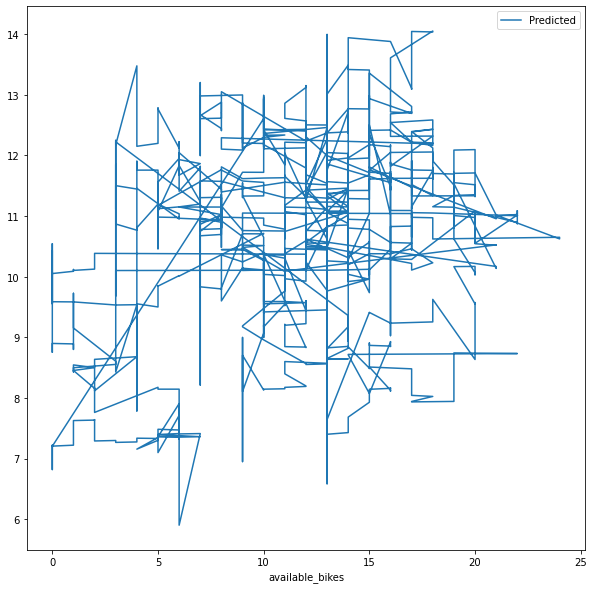

In [217]:
actual_vs_predicted_linreg1.plot(x="available_bikes", y="Predicted", kind="line",figsize=(10,10))
plt.show()

In [193]:
#Pair the actual and the predicted values
#This can be done directly with sklearn functions, but below is a manual example to understand how it works
prediction_errors_1 = y_1 - linreg_predictions1
print("Actual - Predicted:\n", prediction_errors_1)
print("\n(Actual - Predicted) squared:\n", prediction_errors_1**2)
print("\n Sum of (Actual - Predicted) squared:\n", (prediction_errors_1**2).sum())

# Print the Mean Squared Error of the model on the training set
mse = (prediction_errors_1** 2).mean()
rmse = ((prediction_errors_1** 2).mean())**0.5

print("\nMean Squared Error:\n", mse)
print("\nRoot Mean Squared Error:\n", rmse)

print("|Actual - Predicted|:\n", abs(prediction_errors_1))

# Print the Mean Absolute Error of the model on the training set
mae = abs(prediction_errors_1).mean()
print("\nMean Absolute Error:\n", mae)

Actual - Predicted:
 last_update
2021-03-08 00:15:03   -1.580852e-14
2021-03-08 00:35:45   -1.581450e-14
2021-03-08 00:45:03   -1.546322e-14
2021-03-08 01:52:13   -1.733414e-14
2021-03-08 02:14:13   -1.738162e-14
                           ...     
2021-03-31 18:15:39    1.776357e-15
2021-03-31 18:29:52    0.000000e+00
2021-03-31 18:41:52    0.000000e+00
2021-03-31 18:50:29   -1.776357e-15
2021-03-31 18:52:22    0.000000e+00
Name: available_bikes, Length: 1578, dtype: float64

(Actual - Predicted) squared:
 last_update
2021-03-08 00:15:03    2.499092e-28
2021-03-08 00:35:45    2.500983e-28
2021-03-08 00:45:03    2.391111e-28
2021-03-08 01:52:13    3.004725e-28
2021-03-08 02:14:13    3.021208e-28
                           ...     
2021-03-31 18:15:39    3.155444e-30
2021-03-31 18:29:52    0.000000e+00
2021-03-31 18:41:52    0.000000e+00
2021-03-31 18:50:29    3.155444e-30
2021-03-31 18:52:22    0.000000e+00
Name: available_bikes, Length: 1578, dtype: float64

 Sum of (Actual - Predicte